In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold

In [4]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import math as math

In [6]:
reservas = pd.read_csv('/content/sample_data/reservas_export.csv')

In [7]:
test = pd.read_csv('/content/sample_data/hotels_test.csv')

In [8]:
reservas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58869 entries, 0 to 58868
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      58869 non-null  int64  
 1   hotel                           58869 non-null  object 
 2   lead_time                       58869 non-null  int64  
 3   arrival_date_year               58869 non-null  int64  
 4   arrival_date_month              58869 non-null  object 
 5   arrival_date_week_number        58869 non-null  int64  
 6   arrival_date_day_of_month       58869 non-null  int64  
 7   stays_in_weekend_nights         58869 non-null  int64  
 8   stays_in_week_nights            58869 non-null  int64  
 9   adults                          58869 non-null  int64  
 10  children                        58869 non-null  float64
 11  babies                          58869 non-null  int64  
 12  meal                            

Preprocesamiento de los datasets

In [9]:
test = test.drop(columns = 'reservation_status_date')

# igualacion Dummies variable Country

In [10]:
reservas_c = (sorted(reservas["country"].dropna().unique()))
test_c = (sorted(test["country"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [11]:
reservas_limpio = pd.get_dummies(reservas, columns=["country"], drop_first=True, dtype='int64')

In [12]:
for country in paises_no_train:

  reservas_limpio["country_" + country] = np.int64(0)

In [13]:
test_limpio = pd.get_dummies(test, columns=["country"], drop_first=True, dtype='int64')

In [14]:
for country in paises_no_test:

  test_limpio["country_" + country] = np.int64(0)

In [15]:
reservas_limpio = reservas_limpio.drop(columns = 'Unnamed: 0')

In [16]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [17]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable hotel

In [18]:
reservas_h = (sorted(reservas_limpio["hotel"].dropna().unique()))
test_h = (sorted(test_limpio["hotel"].dropna().unique()))
paises_no_test = list(set(reservas_h) - set(test_h))
paises_no_train = list(set(test_h) - set(reservas_h))


In [19]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [20]:
for hotel in paises_no_train:
  hotel_ = hotel.replace(" ","_")
  reservas_limpio["hotel_" + hotel_] = np.int64(0)

In [21]:
test_limpio = pd.get_dummies(test_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [22]:
for hotel in paises_no_test:
  hotel_ = hotel.replace(" ","_")
  test_limpio["hotel_" + hotel_] = np.int64(0)

In [23]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [24]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable arrival_date_month

In [25]:
reservas_c = (sorted(reservas_limpio["arrival_date_month"].dropna().unique()))
test_c = (sorted(test_limpio["arrival_date_month"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [26]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["arrival_date_month"], drop_first=True, dtype='int64')

In [27]:
for month in paises_no_train:

  reservas_limpio["arrival_date_month_" + month] = np.int64(0)

In [28]:
test_limpio = pd.get_dummies(test_limpio, columns=["arrival_date_month"], drop_first=True, dtype='int64')

In [29]:
for month in paises_no_test:

  test_limpio["arrival_date_month_" + month] = np.int64(0)

In [30]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [31]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable meal

In [32]:
reservas_c = (sorted(reservas_limpio["meal"].dropna().unique()))
test_c = (sorted(test_limpio["meal"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [33]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["meal"], drop_first=True, dtype='int64')

In [34]:
for meal in paises_no_train:

  reservas_limpio["meal_" + meal] = np.int64(0)

In [35]:
test_limpio = pd.get_dummies(test_limpio, columns=["meal"], drop_first=True, dtype='int64')

In [36]:
for meal in paises_no_test:

  test_limpio["meal_" + meal] = np.int64(0)

In [37]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [38]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable market_segment

In [39]:
reservas_c = (sorted(reservas_limpio["market_segment"].dropna().unique()))
test_c = (sorted(test_limpio["market_segment"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [40]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [41]:
for market_segment in paises_no_train:

  reservas_limpio["market_segment_" + market_segment] = np.int64(0)

In [42]:
test_limpio = pd.get_dummies(test_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [43]:
for market_segment in paises_no_test:

  test_limpio["market_segment_" + market_segment] = np.int64(0)

In [44]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [45]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable distribution_channel

In [46]:
reservas_c = (sorted(reservas_limpio["distribution_channel"].dropna().unique()))
test_c = (sorted(test_limpio["distribution_channel"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [47]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [48]:
for distribution_channel in paises_no_train:

  reservas_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [49]:
test_limpio = pd.get_dummies(test_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [50]:
for distribution_channel in paises_no_test:

  test_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [51]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [52]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable reserved_room_type

In [53]:
reservas_c = (sorted(reservas_limpio["reserved_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["reserved_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [54]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [55]:
for reserved_room_type in paises_no_train:

  reservas_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [56]:
test_limpio = pd.get_dummies(test_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [57]:
for reserved_room_type in paises_no_test:

  test_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [58]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [59]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable assigned_room_type

In [60]:
reservas_c = (sorted(reservas_limpio["assigned_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["assigned_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [61]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [62]:
for assigned_room_type in paises_no_train:

  reservas_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [63]:
test_limpio = pd.get_dummies(test_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [64]:
for assigned_room_type in paises_no_test:

  test_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [65]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [66]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable deposit_type

In [67]:
reservas_c = (sorted(reservas_limpio["deposit_type"].dropna().unique()))
test_c = (sorted(test_limpio["deposit_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [68]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [69]:
for deposit_type in paises_no_train:

  reservas_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [70]:
test_limpio = pd.get_dummies(test_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [71]:
for deposit_type in paises_no_test:

  test_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [72]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [73]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable customer_type

In [74]:
reservas_c = (sorted(reservas_limpio["customer_type"].dropna().unique()))
test_c = (sorted(test_limpio["customer_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [75]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [76]:
for customer in paises_no_train:

  reservas_limpio["customer_type_" + customer] = np.int64(0)

In [77]:
test_limpio = pd.get_dummies(test_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [78]:
for customer in paises_no_test:

  test_limpio["customer_type_" + customer] = np.int64(0)

In [79]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [80]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable arrival_date_year

In [81]:
reservas_c = (sorted(reservas_limpio["arrival_date_year"].dropna().unique()))
test_c = (sorted(test_limpio["arrival_date_year"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [82]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["arrival_date_year"], drop_first=True, dtype='int64')

In [83]:
for year in paises_no_train:

  reservas_limpio["arrival_date_year_" + year] = np.int64(0)

In [84]:
test_limpio = pd.get_dummies(test_limpio, columns=["arrival_date_year"], drop_first=True, dtype='int64')

In [85]:
for year in paises_no_test:

  test_limpio["arrival_date_year_" + year] = np.int64(0)

In [86]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [87]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

In [88]:
reservas_limpio.columns.tolist()

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ATA',
 'country_AUS',
 'country_AUT',
 'country_AZE',
 'country_BEL',
 'country_BEN',
 'country_BGD',
 'country_BGR',
 'country_BHR',
 'country_BIH',
 'country_BLR',
 'country_BOL',
 'country_BRA',
 'country_BRB',
 'country_CAF',
 'country_CHE',
 'country_CHL',
 'country_CHN',
 'country_CIV',
 'country_CMR',
 'country_CN',
 'country_COL',
 'country_COM',
 'country_CPV',
 'country_CRI',
 'country_CUB',
 'country_CYP',
 'country_CZE',
 'country_DEU',
 'country_DNK',
 'country_DOM',
 'country_DZA',
 'co

# preprocesamiento para entrenar

Devolvemos solo las columnas int y float para poder entrenar el modelo. De esta forma podemos revisar si hicimos dummies para todas las variables categoricas.

In [89]:
reservas_sin_cuali = reservas_limpio[reservas_limpio.select_dtypes(include=["int64","float"]).columns.to_list()].copy()

In [91]:
test_sin_cuali = test_limpio[test_limpio.select_dtypes(include=["int","float"]).columns.to_list()].copy()

Ordenamos las columnas de train y test para que queden de igual forma las columnas. Si estan en diferente orden tira error.

In [92]:
reservas_sin_cuali = reservas_sin_cuali.reindex(sorted(reservas_sin_cuali.columns), axis=1)
test_sin_cuali = test_sin_cuali.reindex(sorted(test_sin_cuali.columns), axis=1)

In [93]:
test_sin_cuali['agent'] = test_sin_cuali['agent'].fillna(-1)
test_sin_cuali['company'] = test_sin_cuali['company'].fillna(-1)

In [94]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

In [126]:
score = pd.DataFrame()
for k in range(2, 10):

  X_train_ramdom, X_test_ramdom, y_train_ramdom, y_test_ramdom = train_test_split(a, b, test_size=0.2, random_state=42)

  n=10
  params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}


  folds=k


  kfoldcv = StratifiedKFold(n_splits=folds)


  base_tree = DecisionTreeClassifier()

  scorer_fn = make_scorer(f1_score)

  randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

  randomcv.fit(X_train_ramdom, y_train_ramdom);

  new_row = {'fold': k, "score": randomcv.best_score_}
  score = score.append(new_row, ignore_index=True)

<ipython-input-126-08083a20d9ea>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-126-08083a20d9ea>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-126-08083a20d9ea>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-126-08083a20d9ea>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-126-08083a20d9ea>:33: FutureWarning: The frame.append method is deprecated and will be removed from p

In [129]:
score.head(34)

,fold,score
0,2.0,0.779757
1,3.0,0.676464
2,4.0,0.725830
3,5.0,0.787372
4,6.0,0.780418
5,7.0,0.787687
6,8.0,0.785265
7,9.0,0.778436
8,10.0,0.771849
9,11.0,0.772950


In [133]:
score[score['score'].max() == score['score']]

,fold,score
5,7.0,0.787687


In [136]:
print(randomcv.best_params_)

{'max_depth': 4, 'criterion': 'entropy', 'ccp_alpha': 0.044444444444444446}


In [139]:
folds=7

n=10
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}

kfoldcv = StratifiedKFold(n_splits=folds)

base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)
randomcv.fit(X_train_ramdom, y_train_ramdom);

In [140]:
y_pred_random = randomcv.predict(test_sin_cuali)

In [98]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_random})

In [99]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [100]:
prediccion.to_csv('/content/sample_data/prediccion.csv', index = False)

# GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [143]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(a, b, test_size=0.2, random_state=42)

n=10

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

folds=7

kfoldcv = StratifiedKFold(n_splits=folds)

base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

gridcv = GridSearchCV(estimator=base_tree ,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True', n_jobs=-1)

gridcv.fit(X_train_grid, y_train_grid);

In [144]:
print(gridcv.best_params_)

print(gridcv.best_score_)

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5}
0.7876603651810701


In [146]:
gridcv.cv_results_['mean_test_score']

array([0.4787088 , 0.47891146, 0.6757314 , 0.78018548, 0.78723916,
       0.4787088 , 0.47891146, 0.64531482, 0.76153216, 0.78766037,
       0.4787088 , 0.4787088 , 0.67392743, 0.77836056, 0.78527129,
       0.4787088 , 0.4787088 , 0.64510323, 0.76130591, 0.78697459,
       0.4787088 , 0.4787088 , 0.67392743, 0.77239639, 0.77809355,
       0.4787088 , 0.4787088 , 0.64510323, 0.76130591, 0.78697459,
       0.4787088 , 0.4787088 , 0.67392743, 0.77239639, 0.77809355,
       0.4787088 , 0.4787088 , 0.64510323, 0.75694432, 0.78044278,
       0.4787088 , 0.4787088 , 0.4787088 , 0.77239639, 0.77239639,
       0.4787088 , 0.4787088 , 0.64510323, 0.75694432, 0.78044278,
       0.4787088 , 0.4787088 , 0.4787088 , 0.6842375 , 0.6842375 ,
       0.4787088 , 0.4787088 , 0.64510323, 0.75694432, 0.78044278,
       0.4787088 , 0.4787088 , 0.4787088 , 0.4787088 , 0.4787088 ,
       0.4787088 , 0.4787088 , 0.4787088 , 0.72639836, 0.77381092,
       0.4787088 , 0.4787088 , 0.4787088 , 0.4787088 , 0.47870

In [147]:
y_pred_grid = gridcv.predict(X_test_grid)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_grid, y_pred_grid)
precision = precision_score(y_test_grid, y_pred_grid)
recall = recall_score(y_test_grid, y_pred_grid)
f1 = f1_score(y_test_grid, y_pred_grid)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.786563614744352
Precisión: 0.7851889858046862
Recuperación: 0.7850547195622435
F1-Score: 0.785121846943138
AUC-ROC: 0.7865536844520634


Text(50.722222222222214, 0.5, 'True')

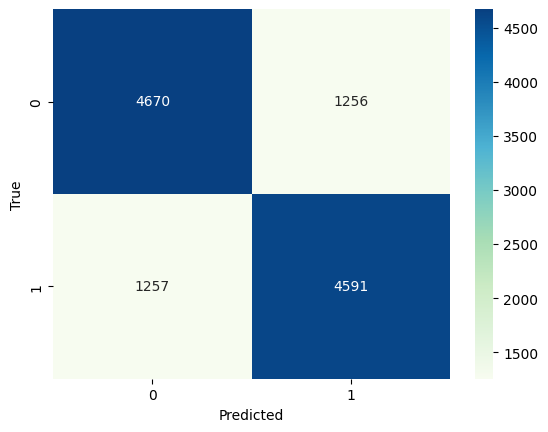

In [154]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [155]:
y_pred_grid = gridcv.predict(test_sin_cuali)

In [158]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_grid})

In [159]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [160]:
prediccion.to_csv('/content/sample_data/prediccion.csv', index = False)

# borrador

In [ ]:
# Identifica las filas en df_test que no están en reservas_limpio basándote en la columna "assigned_room_type"
# Esto crea un nuevo DataFrame "df_c_only" con las filas de "df_test" que no se encuentran en "reservas_limpio"

df_c_only = df_test[~df_test["country"].isin(reservas_limpio["country"])]

In [ ]:
# Llena las demás columnas en "df_c_only" con valores nulos
df_c_only_2 = df_c_only.assign(**{col: None for col in df_test.columns.difference(["country"])})

# Ahora, "df_c_only_2" contiene las mismas columnas que "df_test", pero con las filas que no están en "reservas_limpio" teniendo valores en "assigned_room_type" y valores nulos en las demás columnas

In [ ]:
#agrego a reservas_limpio df_c_only_2
reservas_limpio = pd.concat([reservas_limpio, df_c_only_2], ignore_index=True)

In [ ]:
df_d_only = reservas_limpio[~reservas_limpio["country"].isin(df_test["country"])]

In [ ]:
df_d_only_2 = df_d_only.assign(**{col: None for col in reservas_limpio.columns.difference(["country"])})

In [ ]:
df_test = pd.concat([df_test, df_d_only_2], ignore_index=True)

In [ ]:
df_test.drop("is_canceled",axis='columns', inplace=True)


In [ ]:
df_test.drop("Unnamed: 0",axis='columns', inplace=True)

In [ ]:
df_test.drop("reservation_status_date",axis='columns', inplace=True)
df_test.drop("id",axis='columns', inplace=True)

In [ ]:
reservas_limpio.drop("Unnamed: 0",axis='columns', inplace=True)

In [ ]:
reservas_limpio.drop("id",axis='columns', inplace=True)

In [ ]:
df_test["assigned_room_type"].head(26536)

0        A
1        A
2        D
3        G
4        A
        ..
26531    A
26532    A
26533    A
26534    A
26535    L
Name: assigned_room_type, Length: 26536, dtype: object

In [ ]:
df_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,A,0,Non Refund,NaN,NaN,0,Transient,100.0,0,0
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,A,0,No Deposit,30.0,NaN,176,Transient-Party,101.0,0,0
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,D,0,No Deposit,NaN,NaN,0,Transient,225.0,0,2
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,G,0,No Deposit,240.0,NaN,0,Transient,96.0,0,0
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,A,0,Non Refund,11.0,NaN,0,Transient,30.0,0,0


In [ ]:
reservas_limpio.head(58854)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,company
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9.0,0,Transient,115.50,0,1,1.0,NaN
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,-1.0,0,Transient,42.00,1,0,0.0,NaN
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9.0,0,Transient,229.00,0,2,0.0,NaN
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154.0,0,Transient,75.00,0,0,1.0,NaN
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20.0,0,Transient-Party,75.00,0,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58849,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,-1.0,0,Transient,95.00,0,0,0.0,NaN
58850,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96.0,0,Transient,36.05,0,0,1.0,NaN
58851,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,1,No Deposit,9.0,0,Transient,143.29,0,0,1.0,NaN
58852,None,None,None,None,None,None,None,None,None,NaN,...,None,None,NaN,None,None,NaN,None,None,0.0,NaN


In [ ]:
reservas_limpio['is_canceled'].fillna(0, inplace=True)

In [ ]:
columnas_a_eliminar = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "deposit_type", "customer_type"]

# Elimina las columnas utilizando el método drop
df_test = df_test.drop(columnas_a_eliminar, axis=1)

In [ ]:
df_test = pd.get_dummies(df_test, columns=["assigned_room_type"], drop_first=True)

In [ ]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["assigned_room_type"], drop_first=True)

In [ ]:
columnas_a_eliminar = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "deposit_type", "customer_type"]

# Elimina las columnas utilizando el método drop
reservas_limpio = reservas_limpio.drop(columnas_a_eliminar, axis=1)

In [ ]:
X = reservas_limpio.drop(['is_canceled'], axis=1)
y = reservas_limpio['is_canceled']

In [ ]:
y.isna().sum()

0

In [ ]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["hotel","arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"], drop_first=True)

In [ ]:
df_test["is_canceled"] = 0

In [ ]:
df_arbol = pd.get_dummies(df_arbol, columns=["hotel","arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"], drop_first=True)

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
reservas_limpio["is_canceled"]

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
58852    NaN
58853    NaN
58854    NaN
58855    NaN
58856    NaN
Name: is_canceled, Length: 58857, dtype: float64

In [ ]:
df_test.drop("reservation_status_date",axis='columns', inplace=True)

In [ ]:
df_arbol = reservas_limpio.copy()

In [ ]:
columnas_a_eliminar = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "deposit_type", "customer_type"]

# Elimina las columnas utilizando el método drop
df_test = df_test.drop("id", axis=1)

In [ ]:
df_test = pd.get_dummies(df_test, columns=["assigned_room_type"], drop_first=True)

In [ ]:
columnas_a_eliminar = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "deposit_type", "customer_type"]

# Elimina las columnas utilizando el método drop
reservas_limpio = reservas_limpio.drop(columnas_a_eliminar, axis=1)

In [ ]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["assigned_room_type"], drop_first=True)

In [ ]:
df_test.info()

In [ ]:
df_test.drop(['is_canceled'], axis=1)

In [ ]:
a = reservas_limpio.drop(['is_canceled'], axis=1)
b = reservas_limpio['is_canceled']

In [ ]:
a = a.drop(['company'], axis=1)

In [ ]:
X.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,49,2016,37,5,1,2,1,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4,2015,44,31,0,1,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,2016,42,13,0,1,2,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,26,2016,51,12,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,2017,12,19,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
a.fillna(0, inplace=True)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       58857 non-null  int64  
 1   arrival_date_year               58857 non-null  int64  
 2   arrival_date_week_number        58857 non-null  int64  
 3   arrival_date_day_of_month       58857 non-null  int64  
 4   stays_in_weekend_nights         58857 non-null  int64  
 5   stays_in_week_nights            58857 non-null  int64  
 6   adults                          58857 non-null  int64  
 7   children                        58857 non-null  float64
 8   babies                          58857 non-null  int64  
 9   is_repeated_guest               58857 non-null  int64  
 10  previous_cancellations          58857 non-null  int64  
 11  previous_bookings_not_canceled  58857 non-null  int64  
 12  booking_changes                 

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 58857 entries, 0 to 58856
Series name: is_canceled
Non-Null Count  Dtype  
--------------  -----  
58857 non-null  float64
dtypes: float64(1)
memory usage: 459.9 KB


In [ ]:
X_train_ramdom, X_test_ramdom, y_train_ramdom, y_test_ramdom = train_test_split(a, b, test_size=0.2, random_state=42)

n=10
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}


folds=5


kfoldcv = StratifiedKFold(n_splits=folds)


base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

randomcv.fit(X_train_ramdom, y_train_ramdom);

In [ ]:
print(randomcv.best_params_)

print(randomcv.best_score_)

{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.7079000450273079


In [ ]:
df_test = df_test.drop(['company'], axis=1)

In [ ]:
df_test.isna().sum()
df_test.fillna(0, inplace=True)

In [ ]:
a.isna().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
assigned_room_type_B              0
assigned_room_type_C              0
assigned_room_type_D              0
assigned_room_type_E              0
assigned_room_type_F              0
assigned_room_type_G              0
assigned_room_type_H              0
assigned_room_type_I              0
assigned_room_type_K              0
assigned_room_type_L        

In [ ]:
y_test_ramdom.info()

<class 'pandas.core.series.Series'>
Int64Index: 11772 entries, 7845 to 23200
Series name: is_canceled
Non-Null Count  Dtype  
--------------  -----  
11772 non-null  float64
dtypes: float64(1)
memory usage: 183.9 KB


In [ ]:
y_pred_ramdom.info()

AttributeError: ignored

In [ ]:
y_pred_ramdom = randomcv.predict(df_test)

In [ ]:
y_pred_ramdom = randomcv.predict(df_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_ramdom, y_pred_ramdom)
precision = precision_score(y_test_ramdom, y_pred_ramdom)
recall = recall_score(y_test_ramdom, y_pred_ramdom)
f1 = f1_score(y_test_ramdom, y_pred_ramdom)
roc_auc = roc_auc_score(y_test_ramdom, y_pred_ramdom)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

ValueError: ignored

In [ ]:
reservas_limpio["is_canceled"].head()

0    1
1    0
2    0
3    1
4    0
Name: is_canceled, dtype: object

In [ ]:
le = LabelEncoder()
y["is_canceled"] = le.fit_transform(y["is_canceled"])

KeyError: ignored

In [ ]:
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

In [ ]:
randomcv.fit(X, y);

ValueError: ignored

In [ ]:
X_train_ramdom, X_test_ramdom, y_train_ramdom, y_test_ramdom = train_test_split(X, y, test_size=0.2, random_state=42)

n=10


params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}


folds=5


kfoldcv = StratifiedKFold(n_splits=folds)


base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)


randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)


randomcv.fit(X_train_ramdom, y_train_ramdom);

ValueError: ignored

In [ ]:
print(randomcv.best_params_)

print(randomcv.best_score_)

In [ ]:
randomcv.cv_results_['mean_test_score']

In [ ]:
y_pred_ramdom = randomcv.predict(df_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_ramdom, y_pred_ramdom)
precision = precision_score(y_test_ramdom, y_pred_ramdom)
recall = recall_score(y_test_ramdom, y_pred_ramdom)
f1 = f1_score(y_test_ramdom, y_pred_ramdom)
roc_auc = roc_auc_score(y_test_ramdom, y_pred_ramdom)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_ramdom, y_pred_ramdom)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X, y, test_size=0.2, random_state=42)

n=10


params_grid = {}


folds=5

kfoldcv = StratifiedKFold(n_splits=folds)


base_tree = DecisionTreeClassifier()


scorer_fn = make_scorer(f1_score)

gridcv = GridSearchCV(estimator=base_tree ,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True')

gridcv.fit(X_train_grid, y_train_grid);

In [ ]:
print(gridcv.best_params_)

print(gridcv.best_score_)

In [ ]:
gridcv.cv_results_['mean_test_score']

In [ ]:
y_pred_grid = gridcv.predict(X_test_grid)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_grid, y_pred_grid)
precision = precision_score(y_test_grid, y_pred_grid)
recall = recall_score(y_test_grid, y_pred_grid)
f1 = f1_score(y_test_grid, y_pred_grid)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

In [ ]:

tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(50.722222222222214, 0.5, 'True')

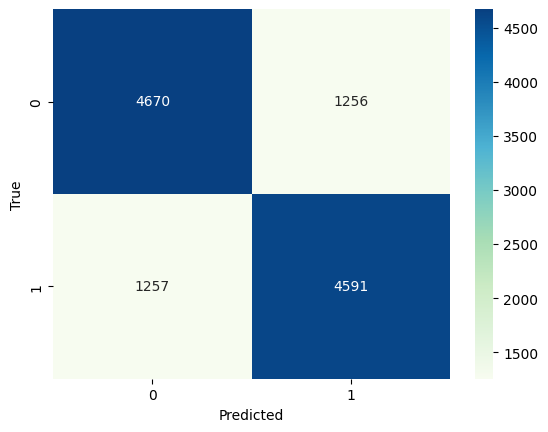

In [149]:

tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)

# Realizar Cross Validation para ajustar los hiperparámetros
scores = cross_val_score(clf, X_train_br, y_train_br, cv=5, scoring='precision')

# Encuentra la mejor precisión promedio y el mejor valor de hiperparámetro
best_precision = max(scores)
best_hyperparameter = clf.get_params()

print("Mejor precisión promedio:", best_precision)
print("Mejores hiperparámetros:", best_hyperparameter)

In [ ]:
clf_best = DecisionTreeClassifier(**best_hyperparameter)
clf_best.fit(X_train_br, y_train_br)

y_pred_br = clf_best.predict(X_test_br)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_br, y_pred_br)
precision = precision_score(y_test_br, y_pred_br)
recall = recall_score(y_test_br, y_pred_br)
f1 = f1_score(y_test_br, y_pred_br)
roc_auc = roc_auc_score(y_test_br, y_pred_br)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_br, y_pred_br)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# **borrador**

In [ ]:
import pandas as pd

# Carga los datasets "a" y "b"
df_a = pd.read_csv("dataset_a.csv")  # Reemplaza "dataset_a.csv" con el nombre de tu archivo CSV de "a"
df_b = pd.read_csv("dataset_b.csv")  # Reemplaza "dataset_b.csv" con el nombre de tu archivo CSV de "b"

# Identifica las filas en "a" que no están en "b" basándote en la columna "c" (suponemos que "c" es la columna clave)
# Esto crea un nuevo DataFrame "df_c_only" con las filas de "a" que no se encuentran en "b"
df_c_only = df_a[~df_a["c"].isin(df_b["c"])]

# Llena las demás columnas en "df_c_only" con valores nulos
df_c_only = df_c_only.assign(**{col: None for col in df_a.columns.difference(["c"])})

# Ahora, "df_c_only" contiene las mismas columnas que "a", pero con las filas que no están en "b" teniendo valores en "c" y valores nulos en las demás columnas

# Puedes guardar este nuevo dataset en un archivo CSV si lo deseas
df_c_only.to_csv("dataset_c_only.csv", index=False)

In [ ]:
reservas_limpio = pd.read_csv('/content/sample_data/reservas_export.csv')

In [ ]:
reservas_limpio_filtrado = reservas_limpio[reservas_limpio["assigned_room_type"] == "P"]
reservas_limpio_filtrado.head()

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


In [ ]:
df_c_only = df_test[~df_test["assigned_room_type"].isin(reservas_limpio["assigned_room_type"])]

In [ ]:
df_c_only_2 = df_c_only.assign(**{col: None for col in df_test.columns.difference(["assigned_room_type"])})

In [ ]:
reservas_limpio = pd.concat([reservas_limpio, df_c_only_2], ignore_index=True)

In [ ]:
reservas_limpio_filtrado = reservas_limpio[reservas_limpio["assigned_room_type"] == "P"]
reservas_limpio_filtrado["assigned_room_type"].head()

58852    P
58853    P
58854    P
58855    P
58856    P
Name: assigned_room_type, dtype: object

In [ ]:
df_d_only = reservas_limpio[~reservas_limpio["assigned_room_type"].isin(df_test["assigned_room_type"])]

In [ ]:
df_d_only_2 = df_d_only.assign(**{col: None for col in reservas_limpio.columns.difference(["assigned_room_type"])})

In [ ]:
df_test = pd.concat([df_test, df_d_only_2], ignore_index=True)

In [ ]:
reservas_limpio["is_canceled"]

0           1
1           0
2           0
3           1
4           0
         ... 
58852    None
58853    None
58854    None
58855    None
58856    None
Name: is_canceled, Length: 58857, dtype: object

In [ ]:
df_c_only_2.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
12796,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18126,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19984,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23151,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
25056,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_c_only.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id


In [ ]:
df_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,No Deposit,30.0,NaN,176,Transient-Party,101.0,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,No Deposit,NaN,NaN,0,Transient,225.0,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,96.0,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,Non Refund,11.0,NaN,0,Transient,30.0,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           26535 non-null  object 
 1   lead_time                       26535 non-null  int64  
 2   arrival_date_year               26535 non-null  int64  
 3   arrival_date_month              26535 non-null  object 
 4   arrival_date_week_number        26535 non-null  int64  
 5   arrival_date_day_of_month       26535 non-null  int64  
 6   stays_in_weekend_nights         26535 non-null  int64  
 7   stays_in_week_nights            26535 non-null  int64  
 8   adults                          26535 non-null  int64  
 9   children                        26535 non-null  float64
 10  babies                          26535 non-null  int64  
 11  meal                            26535 non-null  object 
 12  country                         

In [ ]:
df_test_pais = df_test["reserved_room_type"]
df_test_pais.head()

0    A
1    A
2    D
3    G
4    A
Name: reserved_room_type, dtype: object

In [ ]:
reservas_limpio_pais = reservas_limpio["reserved_room_type"]
reservas_limpio_pais.head()

0    D
1    A
2    F
3    A
4    A
Name: reserved_room_type, dtype: object

In [ ]:
hola = pd.merge(df_test_pais, reservas_limpio_pais,
how='outer', on='reserved_room_type')